In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("../data/part1/part1_daily.csv")
df['datetime'] = pd.to_datetime(df['datetime'], yearfirst=True)
df.set_index('datetime', inplace=True)
df_recent_daegu = df[(df.index >= '2020-02-17') & (df['region'] == '대구') | ('2019-12-07' <= df.index) & (df.index < '2020-02-17')]
df_recent_kr = df[(df.index >= '2019-12-07') & (df['region'] != '대구')]

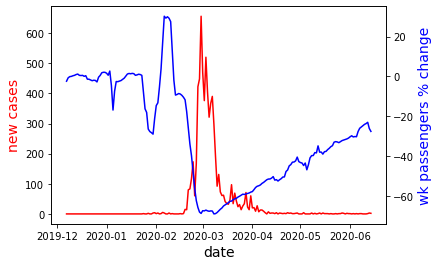

In [2]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recent_daegu.index, df_recent_daegu['new'], color="red")
# ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_daegu.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

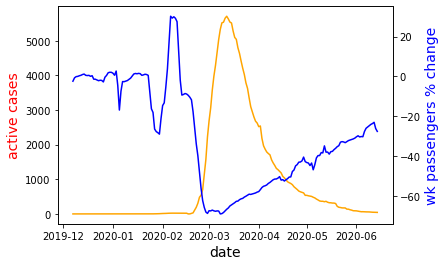

In [3]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
# ax.plot(df_recent_daegu.index, df_recent_daegu['new'], color="red")
ax.plot(df_recent_daegu.index, df_recent_daegu['active'], color="orange")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("active cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_daegu.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

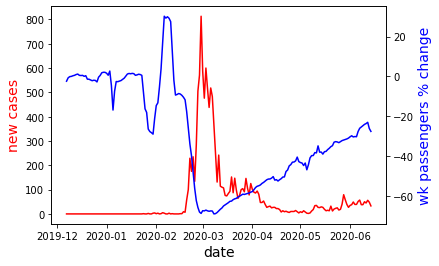

In [4]:

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot(df_recent_kr.index, df_recent_kr['new'], color="red")
# ax.plot(df_recent_kr.index, df_recent_kr['active'], color="orange")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_kr.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')




In [ ]:


# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
# ax.plot(df_recent_kr.index, df_recent_kr['new'], color="red")
ax.plot(df_recent_kr.index, df_recent_kr['active'], color="orange")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
ax.fmt_xdata = mdates.DateFormatter("%m")
# set y-axis label
ax.set_ylabel("new cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_recent_kr.index, df_recent_daegu["weekly_passengers_1y_change"],color="blue")
# ax2.fmt_xdata = mdates.DateFormatter("%m")
ax2.set_ylabel("wk passengers % change",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')




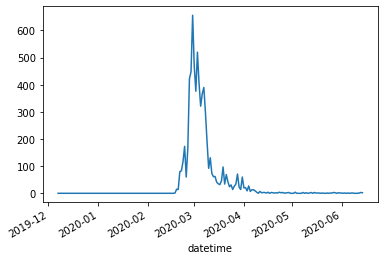

In [5]:
df_recent_daegu['new'].plot()
plt.show()
